In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
df0 = pd.read_csv('Crude Oil Prices.csv', index_col='Date', parse_dates=True)

In [4]:
df = df0[['Close/Last']].copy()

In [5]:
df.reset_index(level=0, inplace=True)
df=df.sort_values(by='Date')
df=df.set_index('Date')

In [6]:
df.head()

,Close/Last
Date,
2011-08-08,81.31
2011-08-09,79.30
2011-08-10,82.89
2011-08-11,85.72
2011-08-12,85.38


In [7]:
df['LogClose/Last'] = np.log(df['Close/Last'])

c:\users\hp envy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
df['DiffLogClose/Last'] = df['LogClose/Last'].diff()

In [9]:
Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [10]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose/Last']])
test_scaled = scaler.transform(test[['DiffLogClose/Last']])

In [11]:
len(train_scaled)

2194

In [12]:
type(test_scaled)

numpy.ndarray

In [13]:
df.shape

(2559, 3)

In [14]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last
Date,,,
2011-08-08,81.31,4.398269,NaN
2011-08-09,79.30,4.373238,-0.025031
2011-08-10,82.89,4.417514,0.044276
2011-08-11,85.72,4.451086,0.033572
2011-08-12,85.38,4.447112,-0.003974


In [15]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [16]:
train.shape

(2194, 3)

In [17]:
train.index[-1]

Timestamp('2020-02-26 00:00:00')

In [18]:
t = np.concatenate((train_scaled, test_scaled))

In [19]:
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

In [20]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn
Date,,,,
2011-08-08,81.31,4.398269,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010
2011-08-10,82.89,4.417514,0.044276,2.137786
2011-08-11,85.72,4.451086,0.033572,1.623651
2011-08-12,85.38,4.447112,-0.003974,-0.179671


In [21]:
df1 = df.dropna()

In [22]:
df1.shape

(2556, 4)

In [23]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 365
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2191, 365) Y.shape (2191,)


In [24]:
Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]

In [25]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [26]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [27]:
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)

Epoch 1/600
58/58 [==============================] - 54s 342ms/step - loss: 7.3800 - val_loss: 0.7025
Epoch 2/600
58/58 [==============================] - 8s 132ms/step - loss: 2.4612 - val_loss: 0.6106
Epoch 3/600
58/58 [==============================] - 7s 130ms/step - loss: 1.7937 - val_loss: 0.5821
Epoch 4/600
58/58 [==============================] - 1s 10ms/step - loss: 1.6540 - val_loss: 0.5633
Epoch 5/600
58/58 [==============================] - 8s 136ms/step - loss: 1.4194 - val_loss: 0.5519
Epoch 6/600
58/58 [==============================] - 1s 23ms/step - loss: 0.9557 - val_loss: 0.5613
Epoch 7/600
58/58 [==============================] - 6s 110ms/step - loss: 1.2014 - val_loss: 0.5603
Epoch 8/600
58/58 [==============================] - 1s 16ms/step - loss: 0.8072 - val_loss: 0.5578
Epoch 9/600
58/58 [==============================] - 9s 152ms/step - loss: 0.6427 - val_loss: 0.5693
Epoch 10/600
58/58 [==============================] - 6s 112ms/step - loss: 0.5943 - val_loss

Epoch 82/600
58/58 [==============================] - 1s 25ms/step - loss: 0.1574 - val_loss: 0.6402
Epoch 83/600
58/58 [==============================] - 5s 91ms/step - loss: 0.1047 - val_loss: 0.6108
Epoch 84/600
58/58 [==============================] - 0s 7ms/step - loss: 0.0935 - val_loss: 0.6228
Epoch 85/600
58/58 [==============================] - 6s 109ms/step - loss: 0.1095 - val_loss: 0.6102
Epoch 86/600
58/58 [==============================] - 0s 7ms/step - loss: 0.1046 - val_loss: 0.6283
Epoch 87/600
58/58 [==============================] - 2s 30ms/step - loss: 0.0992 - val_loss: 0.6086
Epoch 88/600
58/58 [==============================] - 5s 85ms/step - loss: 0.0865 - val_loss: 0.6138
Epoch 89/600
58/58 [==============================] - 7s 116ms/step - loss: 0.1120 - val_loss: 0.6123
Epoch 90/600
58/58 [==============================] - 0s 6ms/step - loss: 0.0888 - val_loss: 0.6129
Epoch 91/600
58/58 [==============================] - 1s 22ms/step - loss: 0.0957 - val_loss

58/58 [==============================] - 1s 18ms/step - loss: 0.0287 - val_loss: 0.5666
Epoch 163/600
58/58 [==============================] - 6s 95ms/step - loss: 0.0279 - val_loss: 0.5682
Epoch 164/600
58/58 [==============================] - 0s 6ms/step - loss: 0.0324 - val_loss: 0.5724
Epoch 165/600
58/58 [==============================] - 6s 109ms/step - loss: 0.0429 - val_loss: 0.5653
Epoch 166/600
58/58 [==============================] - 0s 6ms/step - loss: 0.0505 - val_loss: 0.5822
Epoch 167/600
58/58 [==============================] - 1s 12ms/step - loss: 0.1336 - val_loss: 0.5690
Epoch 168/600
58/58 [==============================] - 8s 143ms/step - loss: 0.0868 - val_loss: 0.5729
Epoch 169/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0553 - val_loss: 0.5726
Epoch 170/600
58/58 [==============================] - 6s 111ms/step - loss: 0.0448 - val_loss: 0.5726
Epoch 171/600
58/58 [==============================] - 1s 23ms/step - loss: 0.0422 - val_loss: 

Epoch 242/600
58/58 [==============================] - 2s 33ms/step - loss: 0.0319 - val_loss: 0.5610
Epoch 243/600
58/58 [==============================] - 5s 81ms/step - loss: 0.0363 - val_loss: 0.5655
Epoch 244/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0536 - val_loss: 0.5569
Epoch 245/600
58/58 [==============================] - 8s 139ms/step - loss: 0.0431 - val_loss: 0.5557
Epoch 246/600
58/58 [==============================] - 5s 93ms/step - loss: 0.0445 - val_loss: 0.5613
Epoch 247/600
58/58 [==============================] - 1s 12ms/step - loss: 0.0499 - val_loss: 0.5608
Epoch 248/600
58/58 [==============================] - 8s 135ms/step - loss: 0.0482 - val_loss: 0.5464
Epoch 249/600
58/58 [==============================] - 12s 214ms/step - loss: 0.0873 - val_loss: 0.5563
Epoch 250/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0440 - val_loss: 0.5529
Epoch 251/600
58/58 [==============================] - 1s 20ms/step - loss: 0.0

58/58 [==============================] - 6s 111ms/step - loss: 0.0199 - val_loss: 0.5489
Epoch 323/600
58/58 [==============================] - 2s 29ms/step - loss: 0.0224 - val_loss: 0.5540
Epoch 324/600
58/58 [==============================] - 5s 86ms/step - loss: 0.0282 - val_loss: 0.5527
Epoch 325/600
58/58 [==============================] - 6s 110ms/step - loss: 0.0335 - val_loss: 0.5496
Epoch 326/600
58/58 [==============================] - 0s 7ms/step - loss: 0.0278 - val_loss: 0.5515
Epoch 327/600
58/58 [==============================] - 6s 110ms/step - loss: 0.0540 - val_loss: 0.5471
Epoch 328/600
58/58 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.5475
Epoch 329/600
58/58 [==============================] - 3s 51ms/step - loss: 0.0281 - val_loss: 0.5505
Epoch 330/600
58/58 [==============================] - 0s 7ms/step - loss: 0.0286 - val_loss: 0.5430
Epoch 331/600
58/58 [==============================] - 6s 109ms/step - loss: 0.0276 - val_loss: 

58/58 [==============================] - 13s 143ms/step - loss: 0.0214 - val_loss: 0.5410
Epoch 403/600
58/58 [==============================] - 14s 237ms/step - loss: 0.0263 - val_loss: 0.5397
Epoch 404/600
58/58 [==============================] - 14s 243ms/step - loss: 0.0219 - val_loss: 0.5411
Epoch 405/600
58/58 [==============================] - 19s 335ms/step - loss: 0.0190 - val_loss: 0.5383
Epoch 406/600
58/58 [==============================] - 14s 248ms/step - loss: 0.0162 - val_loss: 0.5387
Epoch 407/600
58/58 [==============================] - 14s 237ms/step - loss: 0.0224 - val_loss: 0.5368
Epoch 408/600
58/58 [==============================] - 14s 244ms/step - loss: 0.0225 - val_loss: 0.5376
Epoch 409/600
58/58 [==============================] - 14s 240ms/step - loss: 0.0172 - val_loss: 0.5366
Epoch 410/600
58/58 [==============================] - 14s 242ms/step - loss: 0.0220 - val_loss: 0.5349
Epoch 411/600
58/58 [==============================] - 14s 238ms/step - loss: 

58/58 [==============================] - 1s 16ms/step - loss: 0.0345 - val_loss: 0.5496
Epoch 482/600
58/58 [==============================] - 6s 102ms/step - loss: 0.0260 - val_loss: 0.5339
Epoch 483/600
58/58 [==============================] - 1s 19ms/step - loss: 0.0158 - val_loss: 0.5389
Epoch 484/600
58/58 [==============================] - 6s 96ms/step - loss: 0.0150 - val_loss: 0.5397
Epoch 485/600
58/58 [==============================] - 1s 14ms/step - loss: 0.0115 - val_loss: 0.5373
Epoch 486/600
58/58 [==============================] - 8s 142ms/step - loss: 0.0114 - val_loss: 0.5359
Epoch 487/600
58/58 [==============================] - 5s 90ms/step - loss: 0.0098 - val_loss: 0.5411
Epoch 488/600
58/58 [==============================] - 1s 25ms/step - loss: 0.0131 - val_loss: 0.5366
Epoch 489/600
58/58 [==============================] - 5s 93ms/step - loss: 0.0161 - val_loss: 0.5364
Epoch 490/600
58/58 [==============================] - 1s 11ms/step - loss: 0.0131 - val_loss:

58/58 [==============================] - 1s 22ms/step - loss: 0.0154 - val_loss: 0.5433
Epoch 562/600
58/58 [==============================] - 6s 107ms/step - loss: 0.0128 - val_loss: 0.5356
Epoch 563/600
58/58 [==============================] - 6s 106ms/step - loss: 0.0088 - val_loss: 0.5443
Epoch 564/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0107 - val_loss: 0.5399
Epoch 565/600
58/58 [==============================] - 6s 112ms/step - loss: 0.0126 - val_loss: 0.5394
Epoch 566/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0117 - val_loss: 0.5460
Epoch 567/600
58/58 [==============================] - 8s 134ms/step - loss: 0.0196 - val_loss: 0.5380
Epoch 568/600
58/58 [==============================] - 6s 103ms/step - loss: 0.0250 - val_loss: 0.5348
Epoch 569/600
58/58 [==============================] - 0s 7ms/step - loss: 0.0232 - val_loss: 0.5388
Epoch 570/600
58/58 [==============================] - 6s 109ms/step - loss: 0.0152 - val_loss

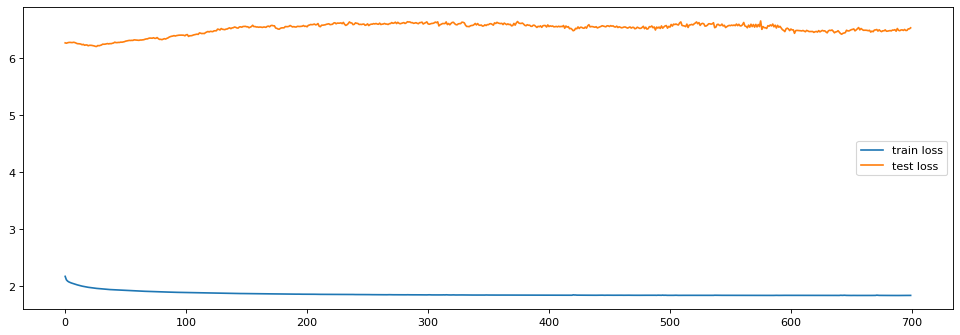

In [70]:
figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')



In [30]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [31]:
train_idx

array([False, False, False, ..., False, False, False])

In [32]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

In [33]:
len(Ptrain)

1826

In [34]:
Ptrain= np.concatenate(([np.nan, np.nan], Ptrain))

In [35]:
df.shape

(2559, 4)

In [36]:
a = np.array([0,0,0,0,0,0,0,0,0,0,0,])

In [37]:
P = np.concatenate(( Ptrain,[0,0], Ptest, a))

In [38]:
# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

In [39]:
df.head(30)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction
Date,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN


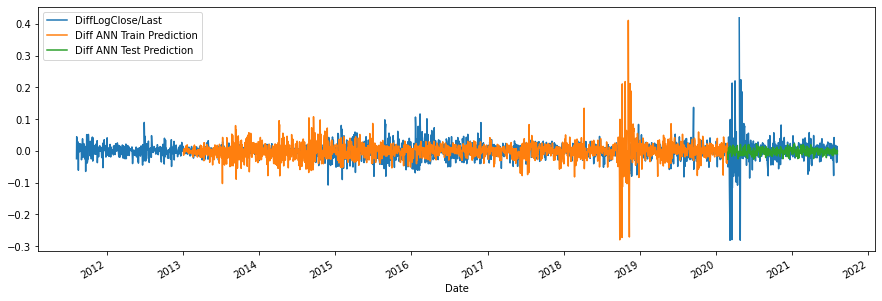

In [40]:
cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

In [41]:
# Needed to compute un-differenced predictions
df['ShiftLogClose/Last'] = df['LogClose/Last'].shift(1)
prev = df['ShiftLogClose/Last']
df

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last
Date,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086
...,...,...,...,...,...,...,...
2021-08-02,71.26,4.266335,-0.037054,-1.768478,NaN,0.001880,4.303389
2021-08-03,70.56,4.256463,-0.009872,-0.462923,NaN,-0.010138,4.266335
2021-08-04,68.15,4.221711,-0.034752,-1.657924,NaN,0.000110,4.256463


In [42]:
# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']

In [43]:
# prev[train_idx] + Ptrain

In [44]:
# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

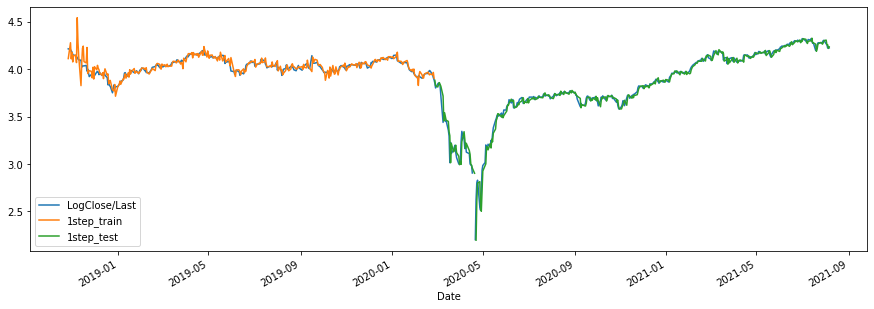

In [45]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [46]:
# prev[test_idx] + np.concatenate((Ptrain, [0,0,0,0,0,0,0,0,0,0,0,0]))

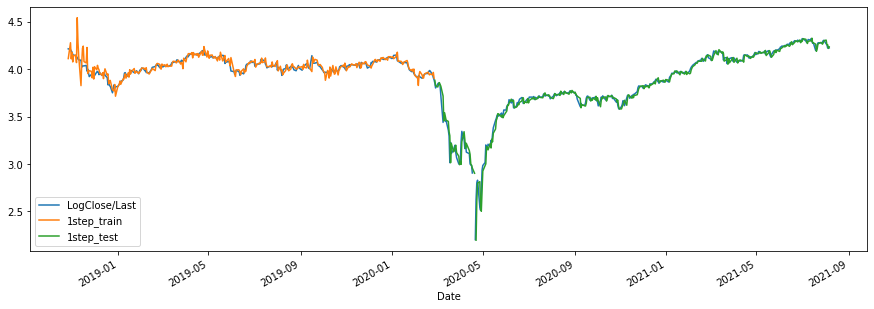

In [47]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [48]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [49]:
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1, 1)).flatten()

In [50]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

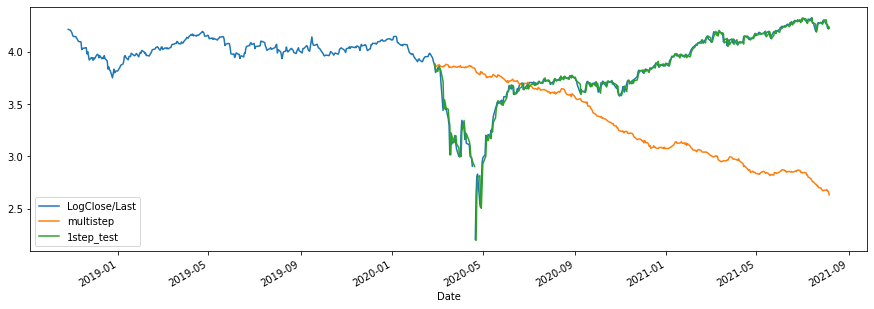

In [51]:
# plot 1-step and multi-step forecast
df.iloc[-700:][['LogClose/Last', 'multistep', '1step_test']].plot(figsize=(15, 5));

In [52]:
# test_log_pass = df.iloc[-Ntest:]['LogClose/Last']
# mape1 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multistep'])
# print("multi-step MAPE:", mape1)
# mape2 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multioutput'])
# print("multi-output MAPE:", mape2)

In [53]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1827, 365) Y.shape (1827, 365)


In [54]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [55]:
 #Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

In [56]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [57]:
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=700,
  validation_data=(Xtest_m, Ytest_m)
)

Epoch 1/700
58/58 [==============================] - 4s 51ms/step - loss: 2.1778 - val_loss: 6.2655
Epoch 2/700
58/58 [==============================] - 3s 50ms/step - loss: 2.0932 - val_loss: 6.2593
Epoch 3/700
58/58 [==============================] - 0s 7ms/step - loss: 2.0779 - val_loss: 6.2675
Epoch 4/700
58/58 [==============================] - 1s 11ms/step - loss: 2.1185 - val_loss: 6.2725
Epoch 5/700
58/58 [==============================] - 2s 43ms/step - loss: 2.0776 - val_loss: 6.2740
Epoch 6/700
58/58 [==============================] - 0s 7ms/step - loss: 2.0177 - val_loss: 6.2711
Epoch 7/700
58/58 [==============================] - 3s 48ms/step - loss: 1.9739 - val_loss: 6.2708
Epoch 8/700
58/58 [==============================] - 0s 7ms/step - loss: 2.0952 - val_loss: 6.2756
Epoch 9/700
58/58 [==============================] - 3s 48ms/step - loss: 2.0212 - val_loss: 6.2710
Epoch 10/700
58/58 [==============================] - 0s 7ms/step - loss: 2.0093 - val_loss: 6.2612
Epo

58/58 [==============================] - 0s 6ms/step - loss: 1.9523 - val_loss: 6.3298
Epoch 83/700
58/58 [==============================] - 3s 48ms/step - loss: 1.8957 - val_loss: 6.3387
Epoch 84/700
58/58 [==============================] - 0s 6ms/step - loss: 1.9085 - val_loss: 6.3323
Epoch 85/700
58/58 [==============================] - 1s 10ms/step - loss: 1.9102 - val_loss: 6.3436
Epoch 86/700
58/58 [==============================] - 2s 44ms/step - loss: 1.9208 - val_loss: 6.3522
Epoch 87/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8913 - val_loss: 6.3665
Epoch 88/700
58/58 [==============================] - 3s 48ms/step - loss: 1.9142 - val_loss: 6.3751
Epoch 89/700
58/58 [==============================] - 0s 7ms/step - loss: 1.9389 - val_loss: 6.3813
Epoch 90/700
58/58 [==============================] - 3s 48ms/step - loss: 1.8283 - val_loss: 6.3849
Epoch 91/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8830 - val_loss: 6.3925
Epoch 92

58/58 [==============================] - 0s 7ms/step - loss: 1.8871 - val_loss: 6.5408
Epoch 164/700
58/58 [==============================] - 3s 48ms/step - loss: 1.9174 - val_loss: 6.5358
Epoch 165/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8396 - val_loss: 6.5425
Epoch 166/700
58/58 [==============================] - 3s 48ms/step - loss: 1.8293 - val_loss: 6.5425
Epoch 167/700
58/58 [==============================] - 0s 7ms/step - loss: 1.9000 - val_loss: 6.5371
Epoch 168/700
58/58 [==============================] - 3s 48ms/step - loss: 1.8603 - val_loss: 6.5536
Epoch 169/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8741 - val_loss: 6.5589
Epoch 170/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8305 - val_loss: 6.5472
Epoch 171/700
58/58 [==============================] - 3s 48ms/step - loss: 1.8831 - val_loss: 6.5671
Epoch 172/700
58/58 [==============================] - 0s 6ms/step - loss: 1.8819 - val_loss: 6.5717


58/58 [==============================] - 0s 7ms/step - loss: 1.8294 - val_loss: 6.6057
Epoch 244/700
58/58 [==============================] - 3s 49ms/step - loss: 1.9027 - val_loss: 6.5874
Epoch 245/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8719 - val_loss: 6.5902
Epoch 246/700
58/58 [==============================] - 0s 7ms/step - loss: 1.9239 - val_loss: 6.5872
Epoch 247/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8853 - val_loss: 6.5926
Epoch 248/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8624 - val_loss: 6.5951
Epoch 249/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8894 - val_loss: 6.5729
Epoch 250/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8597 - val_loss: 6.5807
Epoch 251/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8332 - val_loss: 6.5980
Epoch 252/700
58/58 [==============================] - 0s 7ms/step - loss: 1.9103 - val_loss: 6.5684
Epo

58/58 [==============================] - 0s 7ms/step - loss: 1.7753 - val_loss: 6.6020
Epoch 324/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8024 - val_loss: 6.5855
Epoch 325/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8275 - val_loss: 6.5814
Epoch 326/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8619 - val_loss: 6.5985
Epoch 327/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8376 - val_loss: 6.6023
Epoch 328/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8448 - val_loss: 6.6031
Epoch 329/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8114 - val_loss: 6.6280
Epoch 330/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8533 - val_loss: 6.6249
Epoch 331/700
58/58 [==============================] - 0s 7ms/step - loss: 1.8418 - val_loss: 6.6154
Epoch 332/700
58/58 [==============================] - 0s 6ms/step - loss: 1.7653 - val_loss: 6.5751
Epoc

58/58 [==============================] - 0s 4ms/step - loss: 1.8161 - val_loss: 6.5614
Epoch 405/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8465 - val_loss: 6.5469
Epoch 406/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8071 - val_loss: 6.5482
Epoch 407/700
58/58 [==============================] - 0s 4ms/step - loss: 1.7646 - val_loss: 6.5540
Epoch 408/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8707 - val_loss: 6.5455
Epoch 409/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8591 - val_loss: 6.5571
Epoch 410/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8715 - val_loss: 6.5475
Epoch 411/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8394 - val_loss: 6.5542
Epoch 412/700
58/58 [==============================] - 0s 4ms/step - loss: 1.7937 - val_loss: 6.5496
Epoch 413/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8081 - val_loss: 6.5698
Epoc

58/58 [==============================] - 0s 4ms/step - loss: 1.8244 - val_loss: 6.5444
Epoch 486/700
58/58 [==============================] - 0s 4ms/step - loss: 1.9073 - val_loss: 6.5611
Epoch 487/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8326 - val_loss: 6.5304
Epoch 488/700
58/58 [==============================] - 0s 4ms/step - loss: 1.7676 - val_loss: 6.5437
Epoch 489/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8537 - val_loss: 6.4909
Epoch 490/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8868 - val_loss: 6.5424
Epoch 491/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8391 - val_loss: 6.5245
Epoch 492/700
58/58 [==============================] - ETA: 0s - loss: 1.882 - 0s 4ms/step - loss: 1.8796 - val_loss: 6.5425
Epoch 493/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8796 - val_loss: 6.5173
Epoch 494/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8210

58/58 [==============================] - 0s 4ms/step - loss: 1.7357 - val_loss: 6.5763
Epoch 567/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8194 - val_loss: 6.5411
Epoch 568/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8075 - val_loss: 6.5920
Epoch 569/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8287 - val_loss: 6.5504
Epoch 570/700
58/58 [==============================] - 0s 4ms/step - loss: 1.7837 - val_loss: 6.5867
Epoch 571/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8292 - val_loss: 6.5413
Epoch 572/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8254 - val_loss: 6.5888
Epoch 573/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8341 - val_loss: 6.5445
Epoch 574/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8811 - val_loss: 6.5862
Epoch 575/700
58/58 [==============================] - 0s 4ms/step - loss: 1.7949 - val_loss: 6.5507
Epoc

58/58 [==============================] - 0s 4ms/step - loss: 1.8658 - val_loss: 6.4867
Epoch 648/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8732 - val_loss: 6.4755
Epoch 649/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8486 - val_loss: 6.4743
Epoch 650/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8080 - val_loss: 6.4852
Epoch 651/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8208 - val_loss: 6.4965
Epoch 652/700
58/58 [==============================] - 0s 4ms/step - loss: 1.7741 - val_loss: 6.5015
Epoch 653/700
58/58 [==============================] - 0s 4ms/step - loss: 1.7793 - val_loss: 6.5094
Epoch 654/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8081 - val_loss: 6.4759
Epoch 655/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8777 - val_loss: 6.4923
Epoch 656/700
58/58 [==============================] - 0s 4ms/step - loss: 1.8079 - val_loss: 6.5141
Epoc

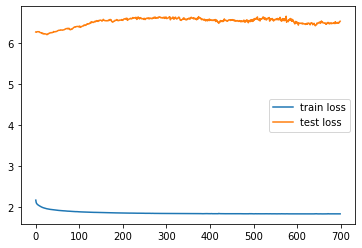

In [58]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [59]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [60]:
Ptrain.shape, Ptest.shape

((1826, 365), (365, 365))

In [61]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [62]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [63]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

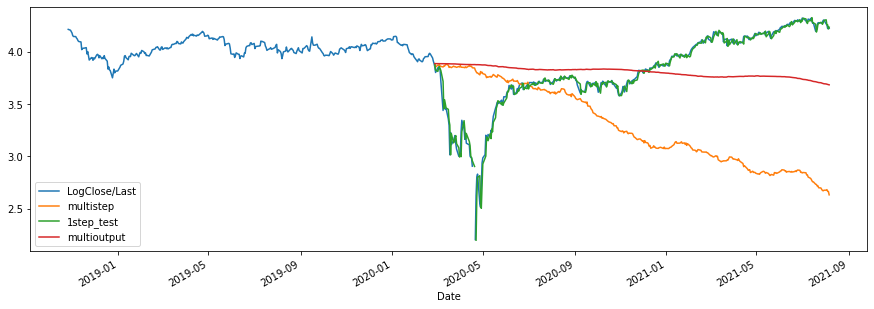

In [64]:
# plot all forecasts
cols = ['LogClose/Last', 'multistep', '1step_test', 'multioutput']
df.iloc[-700:][cols].plot(figsize=(15, 5));

In [65]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose/Last'].notna()

mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)
# mape0 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, '1step_test'])
# print("1step_test MAPE:", mape0)

multi-step MAPE: 47428738439804.31
multi-output MAPE: 47835121773483.83


In [66]:
df.head(10)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last,1step_train,1step_test,multistep,multioutput
Date,,,,,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269,NaN,NaN,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238,NaN,NaN,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514,NaN,NaN,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086,NaN,NaN,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN,4.447112,NaN,NaN,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN,4.475972,NaN,NaN,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN,4.461877,NaN,NaN,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN,4.472553,NaN,NaN,NaN,NaN


In [71]:
from sklearn.metrics import mean_squared_error

mspe1 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MSPE:", mspe1)
mspe2 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MSPE:", mspe2)

multi-step MSPE: 5.4214053
multi-output MSPE: 7.8972135


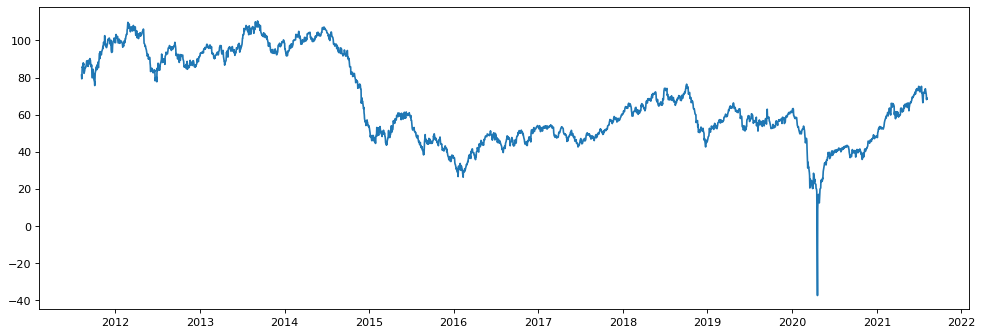

In [68]:
from matplotlib.pyplot import figure

figure(figsize=(15,5), dpi=80)
plt.plot(df.iloc[:][['Close/Last']])
plt.savefig('raw_data_plot.png')

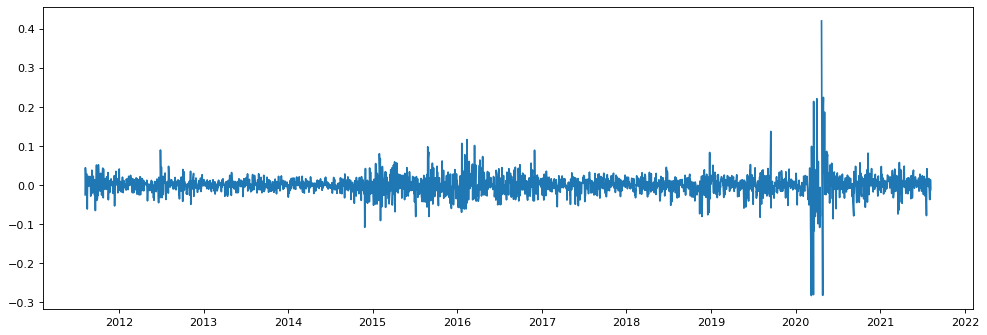

In [69]:
figure(figsize=(15,5), dpi=80)
# cols = ['DiffLogClose/Last 	']
# plt.plot(df[cols])

cols = ['DiffLogClose/Last',]
#         'Diff ANN Train Prediction',
#         'Diff ANN Test Prediction']
plt.plot(df[cols])

plt.savefig('LOGraw_data_error_plot.png')

In [ ]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]


# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)



model.compile(
  loss='mse',
  optimizer='adam',
)


r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)


figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')

train_idx[:T+1] = False # first T+1 values are not predictable


Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()


# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']


# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest


# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));


